# Merge datasets to produce final h5py

In [2]:
# Script to join RData with CSV
import pandas as pd
import numpy as np
import os
import sys

# Read in the RData file
rdata = pd.read_csv("RaCA-dataset-with-locations.csv")

## Collect fields of interest from rdata

In [3]:
rdata_fields = ['rcapid','rcasiteid','sample_id'] + [f'{x}' for x in range(365,2501)]
rdata['rcasiteid'] = rdata['rcapid'].str[:-1] # Remove the last character from the rcapid column to get the rcasiteid
rdata = rdata[rdata_fields] # Filter the rdata dataframe to only include the fields we want

# 'lat','long','region','landuse','group'
print(len(rdata))


121397


The RaCA database outputs many duplicate rows. We remove these, keeping the first.

In [4]:
rdata.drop_duplicates(inplace=True)

In [5]:
print(len(rdata))

115130


## Open XLSX file from RaCA admins and extract relevant data

In [6]:
# Read the data from the sheet named "RaCA_xy" in the Excel file
racaloc = pd.read_excel("RaCA_data_summary_download.xlsx", sheet_name="RaCA_xy", header=0)

racaloc = racaloc.rename(columns={'RaCA_site': 'rcasiteid'})
racaloc = racaloc.rename(columns={'Lat': 'lat'})
racaloc = racaloc.rename(columns={'Lon': 'long'})
racaloc = racaloc.rename(columns={'Region': 'region'})
racaloc = racaloc.rename(columns={'Landuse': 'landuse'})
racaloc = racaloc.rename(columns={'Group': 'group'})

racaloc.drop_duplicates(inplace=True)

Does ``racaloc`` contain unique ``rcasiteid`` values?

In [7]:
duplicates_racaloc = racaloc[racaloc.duplicated(subset='rcasiteid', keep=False)]
duplicate_counts_racaloc = duplicates_racaloc['rcasiteid'].value_counts()

print("Duplicate rcasiteid values in racaloc:")
print(duplicates_racaloc['rcasiteid'].unique())
print("Number of duplicates for each rcasiteid in racaloc:")
print(duplicate_counts_racaloc)

Duplicate rcasiteid values in racaloc:
['C0508R03']
Number of duplicates for each rcasiteid in racaloc:
rcasiteid
C0508R03    2
Name: count, dtype: int64


No. Check the duplicate:

In [8]:
duplicates_racaloc = racaloc[racaloc.duplicated(subset='rcasiteid', keep=False)]
print(duplicates_racaloc)


     rcasiteid        lat       long  region landuse  group
1515  C0508R03  41.168304 -98.831970       5       R      8
1516  C0508R03  41.168306 -98.831972       5       R      8


It's okay to remove the duplicate from ``racaloc`` by taking the first value.

In [9]:
racaloc.drop_duplicates(inplace=True, subset=['rcasiteid'], keep='first')

Now get SOC data:

In [10]:
racasoc     = pd.read_excel("RaCA_data_summary_download.xlsx", sheet_name="RaCA_samples_wmodelBD", header=0)
racasoc_aux = pd.read_excel("RaCA_data_summary_download.xlsx", sheet_name="RaCA_samples_wmodelBD", header=0)

racasoc_fields      = ['rcasiteid','sample.id','adod','c_tot_ncs','caco3','n_tot_ncs','s_tot_ncs']
racasoc_aux_fields  = ['rcasiteid','sample.id']

racasoc = racasoc[racasoc['pedon_no'] == 1]
racasoc = racasoc[racasoc_fields]
racasoc = racasoc.rename(columns={'sample.id': 'sample_id'})

racasoc_aux = racasoc_aux[racasoc_aux['pedon_no'] != 1]
racasoc_aux = racasoc_aux[racasoc_aux_fields]
racasoc_aux = racasoc_aux.rename(columns={'sample.id': 'sample_id'})

In [11]:
print(len(racasoc))
print(len(racasoc_aux))

31347
113780


In [12]:
racaloc.drop_duplicates(inplace=True)
print(len(racaloc))

6418


In [13]:
duplicates_racasoc = racasoc[racasoc.duplicated(subset='sample_id', keep=False)]
duplicate_counts_racasoc = duplicates_racasoc['sample_id'].value_counts()

print("Duplicate sample_id values in racasoc:")
print(duplicates_racasoc['sample_id'].unique().astype(int))
print("Number of duplicates for each sample_id in racasoc:")
print(duplicate_counts_racasoc)

Duplicate sample_id values in racasoc:
[     1     72    117   1918   2529   4052   5167   5168   6150  13543
  13902  14772  18658  19333  19424  19875  20893  21114  21542  26153
  26798  26992  27002  27761  30093  30327  31998  32550  32572  32853
  33035      0  43745  43747  44175  54027  57185  60479  61847  75611
  94653  95591  96291  96469  96566  96611  96632  96633 144454  96679
  96710  96860  96889  97305  97417 144358  99338  99659  99677  99699
  99870  99909 144600 144603 100262 100347 100407 100804 101990 102045
 102485 103141 103432 104045 106477 107149 107423 116986 120017 120195
 120309 120338 120412 121423 121529 121625 122010 122141 122326 122673
 123182 123235 123603 123996 124183 124467 125757 125934 126784 126910
 127062 127492 131112 131872 134819 140765 143475 143693  23242  27954
  32759 120966 123682 142973]
Number of duplicates for each sample_id in racasoc:
sample_id
5168.0      3
1.0         2
103432.0    2
121529.0    2
121423.0    2
           ..
5402

/var/folders/84/rsxv09b17_n57vhqltwy0p900000gn/T/ipykernel_26920/2650515802.py:5: RuntimeWarning: invalid value encountered in cast
  print(duplicates_racasoc['sample_id'].unique().astype(int))


In [14]:
duplicates_racasoc = racasoc[racasoc.duplicated(subset='sample_id', keep=False)]
print(duplicates_racasoc)


       rcasiteid  sample_id      adod  c_tot_ncs      caco3  n_tot_ncs  \
889     C0101F01        1.0  1.122646  48.094150        NaN   2.401340   
890     C0101F01        1.0  1.115296  50.142574        NaN   1.621640   
964     C0101W06       72.0  1.088957  30.258842  30.627863   2.173558   
965     C0101W06       72.0  1.087984  28.499728  25.770186   2.155295   
1011    C0101W08      117.0  1.110671  43.963696        NaN   2.399050   
...          ...        ...       ...        ...        ...        ...   
144248  F1504F06   120966.0  1.002366   0.952248        NaN   0.020047   
144418  F1507R03   123682.0  1.009164   2.573367        NaN   0.100916   
144419  F1507R03   123682.0  1.005626   1.377707        NaN   0.050281   
144963  F1809F94   142973.0  1.025607   4.049098   0.382128   0.390756   
144964  F1809F94   142973.0  1.023010   3.105858   0.276200   0.321225   

        s_tot_ncs  
889      0.187482  
890      0.095915  
964      0.140475  
965      0.193661  
1011     0.

We choose to discard these 232 entries entirely, as there is no documentation to explain their duplication.

In [15]:
print(len(racasoc))
racasoc.drop_duplicates(inplace=True, keep=False)
print(len(racasoc))
racasoc.drop_duplicates(inplace=True, subset=['sample_id'], keep=False)
print(len(racasoc))

31347
31345
31116


In [16]:
print(len(racasoc_aux))
racasoc_aux.drop_duplicates(inplace=True, keep=False)
print(len(racasoc_aux))
racasoc_aux.drop_duplicates(inplace=True, subset=['sample_id'], keep=False)
print(len(racasoc_aux))

113780
113445
113439


## Merge locations with rdata

In [80]:
# Join location data into spectral data
joined = pd.merge(rdata, racaloc, on='rcasiteid', how='left', validate='m:1')
joined_aux = pd.merge(rdata, racaloc, on='rcasiteid', how='left', validate='m:1')

In [81]:
print(len(joined))
print(len(joined_aux))

115130
115130


In [82]:
# Join soil data into spectral data
joined = pd.merge(joined, racasoc, on='sample_id', how='inner', validate='1:1')
joined_aux = pd.merge(joined_aux, racasoc_aux, on='sample_id', how='inner', validate='1:1')

In [83]:
print(len(joined))
print(len(joined_aux))

print(len(joined_aux)+len(joined))

24300
90779
115079


## Cut out hydration outliers

Some of the samples have very high water content:

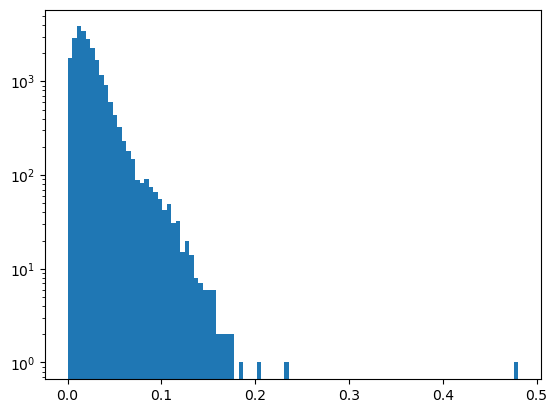

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

plt.hist([1-1/x for x in joined['adod']], bins=100)
plt.yscale('log')
plt.show()


Let's remove the single outlier at 48% moisture content.

In [84]:
index_to_drop = joined[joined['adod'].apply(lambda x: 1 - 1/x > 0.4)].index[0]
print(index_to_drop)

11167


In [85]:
joined.loc[index_to_drop, 'rcapid'][:-1]

'C0706W05'

In [87]:
print(len(joined))
print(len(joined_aux))

for idx in joined_aux[joined_aux['rcapid'].str.contains(joined.loc[index_to_drop, 'rcapid'][:-1])].index :
    joined_aux.drop(idx, inplace=True)

joined.drop(index_to_drop, inplace=True)

print(len(joined))
print(len(joined_aux))



24300
90779
24299
90765


## Generate SOC data

Follow the procedure in the RaCA guidelines to handle caco3 values below 0.

In [88]:
print(((joined['c_tot_ncs'] >= 0).astype(int)).sum())
print(((joined['c_tot_ncs'] < 0).astype(int)).sum())


23590
0


In [89]:
joined = joined.dropna(subset=['c_tot_ncs'])
print(len(joined))

23590


In [90]:
print(((joined['caco3'] >= 0).astype(int)).sum())
print(((joined['caco3'] < 0).astype(int)).sum())

joined['caco3'] = joined['caco3'].fillna(0)
joined.loc[joined['caco3'] < 0, 'caco3'] = 0


13752
487


In [91]:
print(((joined['caco3'] >= 0).astype(int)).sum())
print(((joined['caco3'] < 0).astype(int)).sum())

23590
0


Now compute SOC:

In [92]:
joined['soc'] = joined['c_tot_ncs'] - 0.12*joined['caco3']

Let us check how frequently SOC is negative in abundance. Is it consistent with our assumed error of 0.41%?

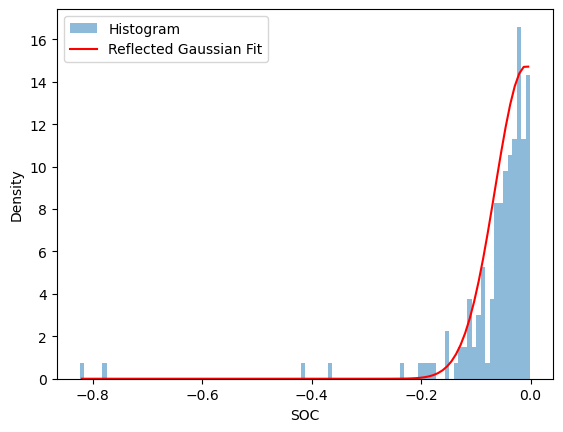

[-8.16789330e-03  5.67551414e-02  1.47441253e+01]


In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the reflected Gaussian function
def reflected_gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Filter the data for negative SOC values
negative_soc = joined[(joined['soc'] < 0)]['soc']

# Generate the histogram
plt.hist(negative_soc, bins=100, density=True, alpha=0.5, label='Histogram')

# Get the histogram data
hist, bins = np.histogram(negative_soc, bins=100, density=True)

# Get the bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Fit the reflected Gaussian distribution
params, _ = curve_fit(reflected_gaussian, -bin_centers, hist)

# Generate the fitted curve
x = np.linspace(min(-bin_centers), max(-bin_centers), 100)
y = reflected_gaussian(-x, *params)

# Plot the fitted curve
plt.plot(-x, y, 'r-', label='Reflected Gaussian Fit')

# Set the plot labels and legend
plt.xlabel('SOC')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()
print(params)


It seems to be appropriate if we assume the negative values are all a proxy for the zero-SOC samples. Given this, set all negative-SOC samples to 0.

In [94]:
joined.loc[joined['soc'] < 0, 'soc'] = 0.

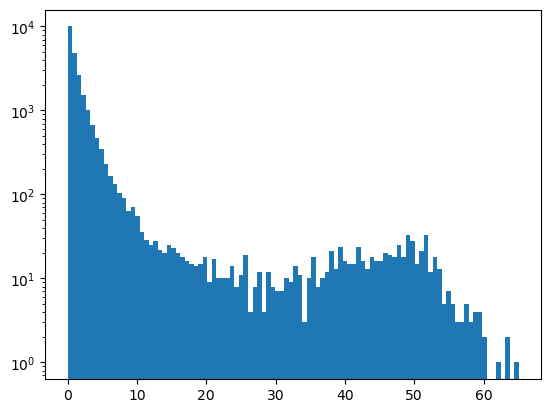

In [95]:
plt.hist(joined['soc'], bins=100);
plt.yscale('log')
plt.show()

In [96]:
print(((joined['soc'] < 0).astype(int)).sum())

0


In [97]:
joined[joined['soc'] < 0]['soc'] = 0
print(((joined['soc'] < 0).astype(int)).sum())
print(((joined['soc'] >= 0).astype(int)).sum())

0
23590


Normalize percentages:

In [98]:
joined['soc'] = joined['soc'] / 100
joined['c_tot_ncs'] = joined['c_tot_ncs'] / 100
joined['caco3'] = joined['c_tot_ncs'] / 100

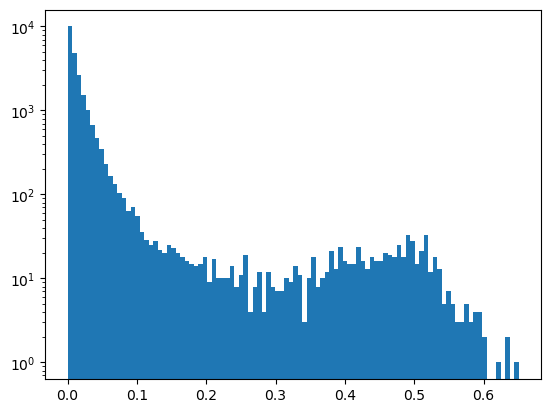

In [101]:
plt.hist(joined['soc'], bins=100);
plt.yscale('log')

## Postprocess spectra to remove dead pixels

Where are the dead pixels?

759


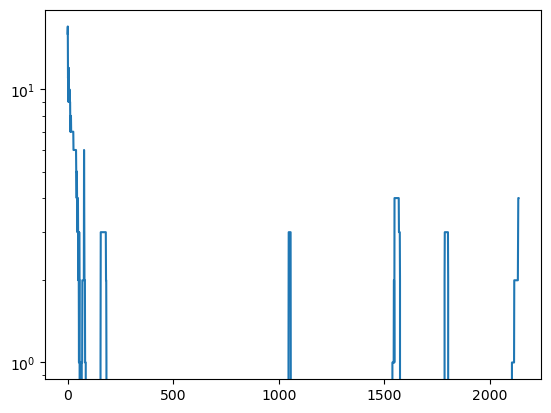

In [102]:
wavelengths = [x for x in range(365, 2501)]
wavelen_txt = [str(x) for x in wavelengths]

hist = plt.plot((joined[wavelen_txt] < 0).astype(int).sum(axis=0).to_numpy())
plt.yscale('log')
print(np.sum((joined[wavelen_txt] < 0).astype(int).to_numpy()))

3869


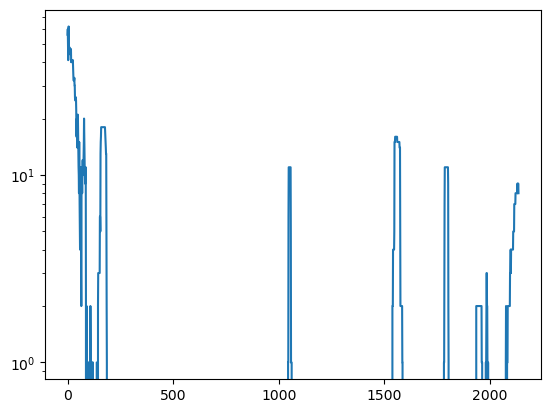

In [103]:
hist = plt.plot((joined_aux[wavelen_txt] < 0).astype(int).sum(axis=0).to_numpy())
plt.yscale('log')
print(np.sum((joined_aux[wavelen_txt] < 0).astype(int).to_numpy()))

What is the number of spectra that have dead pixels?

In [104]:
print(len(joined[(((joined[wavelen_txt] < 0).astype(int) + (joined[wavelen_txt] > 1).astype(int) + (np.isnan(joined[wavelen_txt])).astype(int)).max(axis=1) > 0)]))
print(len(joined_aux[(((joined_aux[wavelen_txt] < 0).astype(int) + (joined_aux[wavelen_txt] > 1).astype(int) + (np.isnan(joined_aux[wavelen_txt])).astype(int)).max(axis=1) > 0)]))

40
127


This is a small number, so delete these 40+127 spectra and check that this worked.

In [105]:
joined = joined.drop(joined[(((joined[wavelen_txt] < 0).astype(int) + (joined[wavelen_txt] > 1).astype(int) + (np.isnan(joined[wavelen_txt])).astype(int)).max(axis=1) > 0)].index)
joined_aux = joined_aux.drop(joined_aux[(((joined_aux[wavelen_txt] < 0).astype(int) + (joined_aux[wavelen_txt] > 1).astype(int) + (np.isnan(joined_aux[wavelen_txt])).astype(int)).max(axis=1) > 0)].index)

In [107]:
print("Number of scans with dead pixels:",len(joined[(((joined[wavelen_txt] < 0).astype(int) + (joined[wavelen_txt] > 1).astype(int) + (np.isnan(joined[wavelen_txt])).astype(int)).max(axis=1) > 0)]))
print("Number of scans without dead pixels:",len(joined[(((joined[wavelen_txt] < 0).astype(int) + (joined[wavelen_txt] > 1).astype(int) + (np.isnan(joined[wavelen_txt])).astype(int)).max(axis=1) == 0)]))

print("Number of aux with dead pixels:",len(joined_aux[(((joined_aux[wavelen_txt] < 0).astype(int) + (joined_aux[wavelen_txt] > 1).astype(int) + (np.isnan(joined_aux[wavelen_txt])).astype(int)).max(axis=1) > 0)]))
print("Number of aux without dead pixels:",len(joined_aux[(((joined_aux[wavelen_txt] < 0).astype(int) + (joined_aux[wavelen_txt] > 1).astype(int) + (np.isnan(joined_aux[wavelen_txt])).astype(int)).max(axis=1) == 0)]))

Number of scans with dead pixels: 0
Number of scans without dead pixels: 23550
Number of aux with dead pixels: 0
Number of aux without dead pixels: 90638


## Save to file

In [108]:
[x for x in joined.columns if x not in wavelen_txt]

['rcapid',
 'rcasiteid_x',
 'sample_id',
 'lat',
 'long',
 'region',
 'landuse',
 'group',
 'rcasiteid_y',
 'adod',
 'c_tot_ncs',
 'caco3',
 'n_tot_ncs',
 's_tot_ncs',
 'soc']

In [110]:
[x for x in joined_aux.columns if x not in wavelen_txt]

['rcapid',
 'rcasiteid_x',
 'sample_id',
 'lat',
 'long',
 'region',
 'landuse',
 'group',
 'rcasiteid_y']

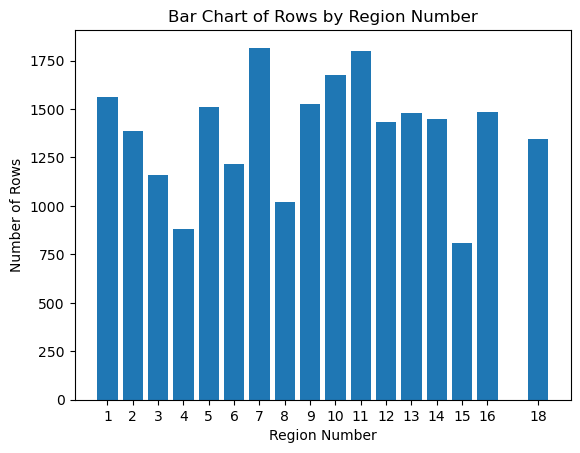

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Access the 'region' column in the 'joined' dataframe
region_counts = joined['region'].value_counts()

# Create a bar chart
plt.bar(region_counts.index, region_counts.values)

# Add labels and title
plt.xlabel('Region Number')
plt.ylabel('Number of Rows')
plt.title('Bar Chart of Rows by Region Number')

# Set x ticks as integers
plt.xticks(region_counts.index)

# Display the bar chart
plt.show()


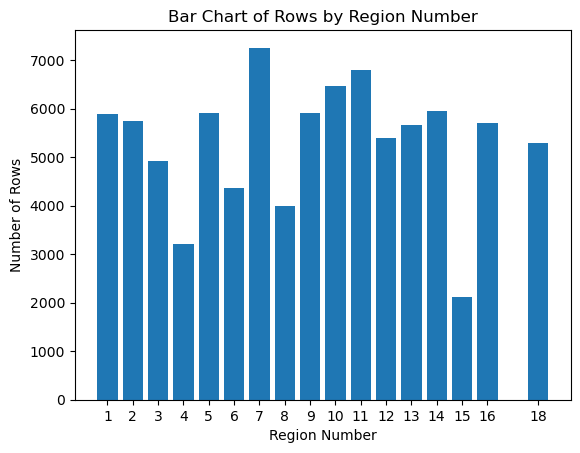

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Access the 'region' column in the 'joined' dataframe
region_counts = joined_aux['region'].value_counts()

# Create a bar chart
plt.bar(region_counts.index, region_counts.values)

# Add labels and title
plt.xlabel('Region Number')
plt.ylabel('Number of Rows')
plt.title('Bar Chart of Rows by Region Number')

# Set x ticks as integers
plt.xticks(region_counts.index)

# Display the bar chart
plt.show()


In [113]:
import torch
import numpy as np
import h5py

with h5py.File("ICLRDataset_RaCASpectraAndSOC_v3.h5", 'w') as hRaCA :
    with h5py.File("ICLRDataset_SplitIndices_v3.h5","w") as hInds :

        for region in joined['region'].unique():
            rr = hInds.create_group(f'{region}')

            region_rows = joined[joined['region'] == region]
            indices = torch.tensor(region_rows.index)
            dsetInds = rr.create_dataset(f'indices', data=indices) 

            region_rows_aux = joined_aux[joined_aux['region'] == region]
            indices_aux = torch.tensor(region_rows_aux.index)
            dsetInds_aux = rr.create_dataset(f'indices_scanonly', data=indices_aux) 

            print(f'{region}: {len(region_rows)} rows with min index {region_rows.index.min()} and max index {region_rows.index.max()}')
            print(f'{region}: {len(region_rows_aux)} rows with min index {region_rows_aux.index.min()} and max index {region_rows_aux.index.max()}')

            # collect all pedons in the region
            # using rcapid as the unique id associated to each pedon
            # where each pedon can have multiple rows in the region
            # and each row has a unique index
            # and collect the related pedons from the aux dataset
            pedon_ids = region_rows['rcapid'].unique()

            for pid in pedon_ids :

                # select all rows from the region that are in the pedon
                bootstrap_rows = region_rows[region_rows['rcapid'] == pid]

                # save the bootstrap rows to the h5 file
                pp = rr.create_group(pid)

                bootInds = pp.create_dataset(f'indices', data=torch.tensor(bootstrap_rows.index))

                # select all related pedons relative to that central pedon
                aux_pedon_rows = region_rows_aux[region_rows_aux['rcapid'].str.contains(pid[:-1])]
                aux_pedon_ids = aux_pedon_rows['rcapid'].unique()

                for aux_pid in aux_pedon_ids :
                    aa = pp.create_group(aux_pid)
                    bootInds_aux = aa.create_dataset(f'indices_scanonly', data=torch.tensor(aux_pedon_rows[aux_pedon_rows['rcapid'] == aux_pid].index))


        for index, row in joined.iterrows():
            dsetRaCA = hRaCA.create_dataset(f'{index}', data=torch.tensor(row[wavelen_txt + ['soc','caco3','adod','n_tot_ncs','s_tot_ncs']]))
            
        for index, row in joined_aux.iterrows():
            dsetRaCAAux = hRaCA.create_dataset(f'{index}_scanonly', data=torch.tensor(row[wavelen_txt]))
                

4: 880 rows with min index 1 and max index 19247
4: 3215 rows with min index 0 and max index 72219
1: 1561 rows with min index 6 and max index 13599
1: 5889 rows with min index 18 and max index 51296
3: 1159 rows with min index 24 and max index 8904
3: 4917 rows with min index 33 and max index 90474
2: 1388 rows with min index 84 and max index 21968
2: 5742 rows with min index 321 and max index 82428
18: 1346 rows with min index 96 and max index 24299
18: 5294 rows with min index 380 and max index 90778
6: 1217 rows with min index 105 and max index 21978
6: 4373 rows with min index 405 and max index 82440
9: 1528 rows with min index 112 and max index 23548
9: 5916 rows with min index 1370 and max index 88676
14: 1446 rows with min index 192 and max index 23144
14: 5957 rows with min index 802 and max index 86821
10: 1675 rows with min index 681 and max index 21982
10: 6479 rows with min index 2614 and max index 82458
11: 1800 rows with min index 692 and max index 21988
11: 6807 rows wi

In [114]:
joined.to_hdf('ICLRDataset_RaCAFullDataset_v3.h5', key='data', mode='w')
joined_aux.to_hdf('ICLRDataset_RaCAFullDatasetAux_v3.h5', key='data', mode='w')